<h3>Project Kelompok Technopreneur</h3>
<h4><b>Nama Anggota :</b></h4>
<h4>Ellisa Pransisca Caesar</h4>
<h4>Meilani</h4>
<h4>Rabiatul Adawiyah Hasibuan</h4>
<h4>Russell</h4>
<h4>Yoan Belinda</h4>

<h3>1. How to.....................explained by Meilani</h3>

In [7]:
import tweepy
import pandas as pd
import numpy as np
from pandas import Series
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import*
import re
import seaborn as sns
from datetime import datetime, timedelta
from sklearn import preprocessing
from tweepy import OAuthHandler
from tweepy import Cursor
from tweepy import API
from nltk.tokenize import word_tokenize
import operator
from collections import Counter
import calendar
import json
import csv
from textblob import TextBlob
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [3]:
def get_twitter_auth():
    try:
        CONSUMER_KEY = 'kXmGW5PeNR3xah6DuuMTpbpy9'
        CONSUMER_SECRET = 'lI1D6yUpnr3AmkOYlhCpV1q59TPBnHAV0x0Yi5nxuhFtW8Tt25'
        ACCESS_TOKEN = '433334980-QlhEXYTZykR2YEkCzWkErbyK29JyLqf9NFEhSsRF'
        ACCESS_SECRET = 'oy21kfFxtBSuObdSZJV1ihsj7fsbKm2RMKcwE1ROJL8px'
    except KeyError:
        sys.stderr.write('Twitter Environment Variables Not Set')
        sys.exit(1)
    auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN,ACCESS_SECRET)
    return auth

def get_twitter_client():
    auth = get_twitter_auth()
    client = API(auth,wait_on_rate_limit=True)
    return client

In [290]:
#message,favorite_count,retweet_count,created_at,user_name,followers_count=[],[],[],[],[],[]

In [9]:
pwd

'C:\\Users\\Russell\\Downloads\\Final Project Technopreneur'

In [ ]:
st=('#Movie OR #Plastik')
if __name__=='__main__':
    client = get_twitter_client()
    with open('randomdata.json','w') as f:
        for tweet in Cursor(client.search,q=st,count=100,since='2019-08-19').pages(100):
            for status in tweet:
                f.write(json.dumps(status._json)+"\n")

In [15]:
data = []
# open your file and add every row as a dict to the list with data
with open("randomdata.json", "r") as f:
    for line in f:
        data.append(json.loads(line))

# make a pandas data frame
df = pd.DataFrame(data)
backup = pd.DataFrame(data)
df.head(2)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,None,None,Mon Aug 26 12:51:27 +0000 2019,"{'hashtags': [{'text': '헨리', 'indices': [78, 8...",NaN,0,False,None,1165970008045801473,1165970008045801473,...,NaN,NaN,NaN,29,False,{'created_at': 'Mon Aug 26 08:44:57 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...","RT @dispatchsns: [V LIVE] ""꿀 떨어진다"" (헨리, 캐서린 프레...",False,"{'id': 427466612, 'id_str': '427466612', 'name..."
1,None,None,Mon Aug 26 12:51:11 +0000 2019,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1165969941297848321,1165969941297848321,...,NaN,NaN,NaN,4,False,{'created_at': 'Mon Aug 26 11:57:13 +0000 2019...,"<a href=""http://twitter.com/download/android"" ...",RT @rinakari: Jeg er blevet spurgt - temmelig ...,False,"{'id': 16201094, 'id_str': '16201094', 'name':..."


In [16]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [197]:
df.dtypes

contributors                  object
coordinates                   object
entities                      object
extended_entities             object
favorite_count                 int64
favorited                       bool
geo                           object
id                             int64
id_str                        object
in_reply_to_screen_name       object
in_reply_to_status_id        float64
in_reply_to_status_id_str     object
in_reply_to_user_id          float64
in_reply_to_user_id_str       object
is_quote_status                 bool
lang                          object
metadata                      object
place                         object
possibly_sensitive            object
quoted_status                 object
quoted_status_id             float64
quoted_status_id_str          object
retweet_count                  int64
retweeted                       bool
retweeted_status              object
source                        object
text                          object
t

In [198]:
df.head(30)

,contributors,coordinates,entities,extended_entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
created_at,,,,,,,,,,,,,,,,,,,,,
2019-08-26 12:51:27+00:00,None,None,"{'hashtags': [{'text': '헨리', 'indices': [78, 8...",NaN,0,False,None,1165970008045801473,1165970008045801473,None,...,NaN,NaN,NaN,29,False,{'created_at': 'Mon Aug 26 08:44:57 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...","RT @dispatchsns: [V LIVE] ""꿀 떨어진다"" (헨리, 캐서린 프레...",False,"{'id': 427466612, 'id_str': '427466612', 'name..."
2019-08-26 12:51:11+00:00,None,None,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1165969941297848321,1165969941297848321,None,...,NaN,NaN,NaN,4,False,{'created_at': 'Mon Aug 26 11:57:13 +0000 2019...,"<a href=""http://twitter.com/download/android"" ...",RT @rinakari: Jeg er blevet spurgt - temmelig ...,False,"{'id': 16201094, 'id_str': '16201094', 'name':..."
2019-08-26 12:50:39+00:00,None,None,"{'hashtags': [{'text': 'actors', 'indices': [9...",NaN,0,False,None,1165969809349038081,1165969809349038081,None,...,NaN,NaN,NaN,14,False,{'created_at': 'Sun Aug 25 10:58:28 +0000 2019...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @julianflynn: Shooting scene in Wasp Networ...,False,"{'id': 1165949283528409088, 'id_str': '1165949..."
2019-08-26 12:50:34+00:00,None,None,"{'hashtags': [{'text': 'FunFact', 'indices': [...",NaN,0,False,None,1165969788390301697,1165969788390301697,None,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...","#FunFact #14: For the movie “The Incredibles,”...",True,"{'id': 1164301872150319110, 'id_str': '1164301..."
2019-08-26 12:50:25+00:00,None,None,"{'hashtags': [{'text': 'Filmmaking', 'indices'...",NaN,0,False,None,1165969747168628737,1165969747168628737,None,...,{'created_at': 'Mon Aug 26 10:09:54 +0000 2019...,1.165929e+18,1165929354318229504,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Interesting things going on #Filmmaking #follo...,False,"{'id': 1165967435276722176, 'id_str': '1165967..."
2019-08-26 12:49:55+00:00,None,None,"{'hashtags': [{'text': 'Rhinecleanup', 'indice...",NaN,0,False,None,1165969625085075456,1165969625085075456,None,...,NaN,NaN,NaN,1,False,{'created_at': 'Mon Aug 26 08:39:06 +0000 2019...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @SparkasseMainz: Am 14. September ist es so...,False,"{'id': 809063390928916480, 'id_str': '80906339..."
2019-08-26 12:48:54+00:00,None,None,"{'hashtags': [{'text': 'TalesOfFrankenstein', ...",NaN,0,False,None,1165969366380371968,1165969366380371968,None,...,NaN,NaN,NaN,1,False,{'created_at': 'Mon Aug 26 12:47:43 +0000 2019...,"<a href=""http://twitter.com/download/android"" ...",RT @lobby_cast: Great work by Donald F Glut\n\...,False,"{'id': 81605109, 'id_str': '81605109', 'name':..."
2019-08-26 12:48:05+00:00,None,"{'type': 'Point', 'coordinates': [139.72981379...","{'hashtags': [{'text': 'design', 'indices': [1...",NaN,0,False,"{'type': 'Point', 'coordinates': [35.66074105,...",1165969163468201986,1165969163468201986,None,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://instagram.com"" rel=""nofollow"">...",☠️\n.\n.\n2回目。笑\n.\n#design #summer #movie #da...,True,"{'id': 566318564, 'id_str': '566318564', 'name..."
2019-08-26 12:47:46+00:00,None,None,"{'hashtags': [{'text': 'animation', 'indices':...","{'media': [{'id': 1101207015634948099, 'id_str...",0,False,None,1165969083428483072,1165969083428483072,None,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://www.autotweeter.in/"" rel=""nofo...",Alan watch the skies. https://t.co/gKtj1r23bV ...,True,"{'id': 3218297201, 'id_str': '3218297201', 'na..."


In [17]:
df = df.set_index(['created_at'])
df.head(2)

,contributors,coordinates,entities,extended_entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
created_at,,,,,,,,,,,,,,,,,,,,,
2019-08-26 12:51:27+00:00,None,None,"{'hashtags': [{'text': '헨리', 'indices': [78, 8...",NaN,0,False,None,1165970008045801473,1165970008045801473,None,...,NaN,NaN,NaN,29,False,{'created_at': 'Mon Aug 26 08:44:57 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...","RT @dispatchsns: [V LIVE] ""꿀 떨어진다"" (헨리, 캐서린 프레...",False,"{'id': 427466612, 'id_str': '427466612', 'name..."
2019-08-26 12:51:11+00:00,None,None,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1165969941297848321,1165969941297848321,None,...,NaN,NaN,NaN,4,False,{'created_at': 'Mon Aug 26 11:57:13 +0000 2019...,"<a href=""http://twitter.com/download/android"" ...",RT @rinakari: Jeg er blevet spurgt - temmelig ...,False,"{'id': 16201094, 'id_str': '16201094', 'name':..."


In [50]:
#df['created_at'] = pd.to_datetime(df['created_at'])

In [18]:
def f(x):
     return Series(dict(Number_of_tweets = x['text'].count(),))

In [19]:
daily_count = df.groupby(df.index.date).apply(f)
len(daily_count)
daily_count.head(5)

,Number_of_tweets
2019-08-21,2894
2019-08-22,3387
2019-08-23,3228
2019-08-24,3196
2019-08-25,2660


In [20]:
daily_count.index.name = 'tanggal'
daily_count.head(5)

,Number_of_tweets
tanggal,
2019-08-21,2894
2019-08-22,3387
2019-08-23,3228
2019-08-24,3196
2019-08-25,2660


In [127]:
daily_count.tail(5)

,Number_of_tweets
tanggal,
2019-08-22,3387
2019-08-23,3228
2019-08-24,3196
2019-08-25,2660
2019-08-26,1370


In [128]:
daily_count.index.min()

datetime.date(2019, 8, 21)

In [129]:
daily_count.index.max()

datetime.date(2019, 8, 26)

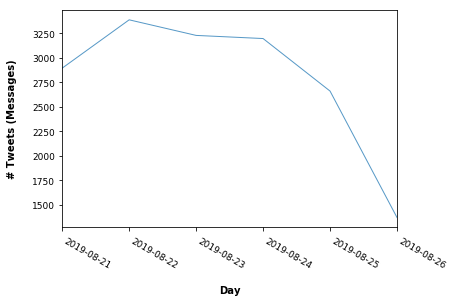

In [21]:
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)

daily_plot.set_xlabel('Day', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL

xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS

#http://matplotlib.org/users/legend_guide.html
#http://nbviewer.ipython.org/gist/olgabot/5357268  ### LIST OF OPTIONS
#legend(fontsize='x-small',loc=2,labelspacing=0.1, frameon=False)#.draggable()
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5) #SET PADDING ABOVE X-AXIS LABELS
#Set x axis label on top of plot, set label text --> https://datasciencelab.wordpress.com/2013/12/21/beautiful-plots-with-pandas-and-matplotlib/
#daily_plot.xaxis.set_label_position('top')

savefig('daily counts.png', bbox_inches='tight', dpi=300, format='png')   #SAVE PLOT IN PNG FORMAT

In [22]:
hourly_count = df.groupby(df.index.hour).apply(f)
hourly_count

,Number_of_tweets
created_at,
0,568
1,534
2,569
3,730
4,663
5,576
6,568
7,665
8,690


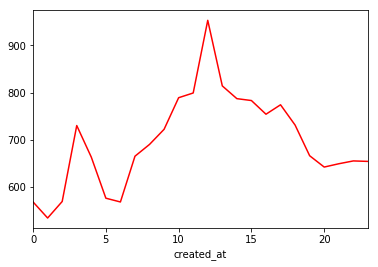

In [23]:
hourly_count = df.groupby(df.index.hour).apply(f)
hourly_plot = hourly_count['Number_of_tweets'].plot(color = ['red'])

([<matplotlib.axis.XTick at 0x2697cfc6470>,
 <a list of 24 Text xticklabel objects>)

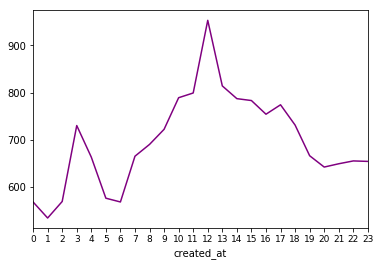

In [25]:
hourly_plot = hourly_count['Number_of_tweets'].plot(color = ['purple'])
xticks(np.arange(24), rotation = 0,fontsize = 9) #, ha ="left") 

<h3>2. How to.....................explained by Rabiatul Adawiyah Hasibuan</h3>

In [133]:
weekday_count = df.groupby(df.index.weekday).apply(f)
weekday_count

,Number_of_tweets
created_at,
0,1370
2,2894
3,3387
4,3228
5,3196
6,2660


In [148]:
days = ['Monday', 'Tuesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_count['day'] = days
weekday_count
#rabu tidak dimasukkan karena data tidak menyangkut hari rabu, 0,2,3,4,5,6

,Number_of_tweets,day
created_at,,
0,1370,Monday
2,2894,Tuesday
3,3387,Thursday
4,3228,Friday
5,3196,Saturday
6,2660,Sunday


In [256]:
hourly_count = df.groupby(df.index.hour).apply(f)
hourly_count

,Number_of_tweets
Created_At,
0,2
1,5
2,1
3,2
4,3
5,3
6,6
7,29
8,98


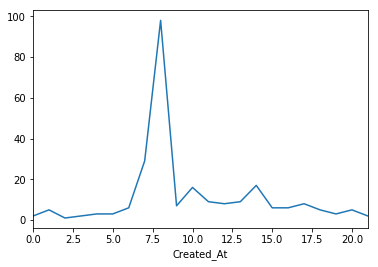

In [257]:
hourly_count = df.groupby(df.index.hour).apply(f)
hourly_plot = hourly_count['Number_of_tweets'].plot()

([<matplotlib.axis.XTick at 0x1f6441f84e0>,
 <a list of 24 Text xticklabel objects>)

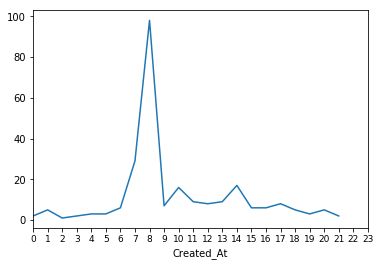

In [269]:
hourly_plot = hourly_count['Number_of_tweets'].plot()
xticks(np.arange(24), rotation = 0,fontsize = 9) #, ha ="left") 

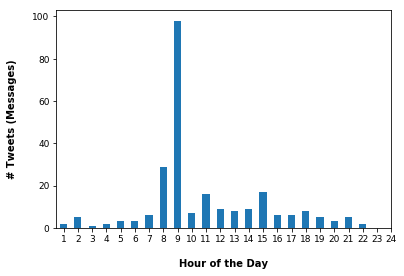

In [281]:
hourly_plot = hourly_count['Number_of_tweets'].plot(kind='bar')
hours = list(range(1,25))                                                 #GENERATE LIST FROM 1 TO 24
xticks(np.arange(24), hours, rotation = 0,fontsize = 9)                   #USE THE CUSTOM TICKS

hourly_plot.set_xlabel('Hour of the Day', weight='bold', labelpad=15)     #SET X-AXIS LABEL, ADD PADDING TO TOP OF X-AXIS LABEL
hourly_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL, ADD PADDING TO RIGHT OF Y-AXIS LABEL

xticks(fontsize = 9, rotation = 0, ha= "center")                          #SET FONT SIZE FOR X-AXIS TICK LABELS
yticks(fontsize = 9)                                                      #SET FONT SIZE FOR Y-AXIS TICK LABELS
daily_plot.tick_params(axis='x', pad=5)                                   #SET PADDING ABOVE X-AXIS LABELS

daily_plot.legend_ = None                                                 #TURN OFF LEGEND

savefig('hourly counts - bar graph.png', bbox_inches='tight', dpi=300, format='png')

In [138]:
minute_count = df.groupby(df.index.minute).apply(f)
len(minute_count)
minute_count.head()

,Number_of_tweets
created_at,
0,538
1,335
2,292
3,268
4,304


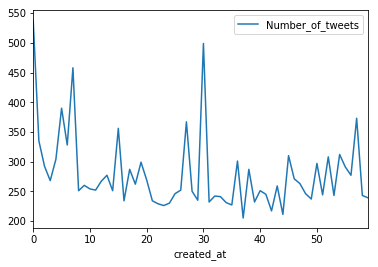

In [139]:
minute_count.plot()

In [140]:
second_count = df.groupby(df.index.second).apply(f)
len(second_count)
second_count.head()

,Number_of_tweets
created_at,
0,553
1,391
2,421
3,433
4,345


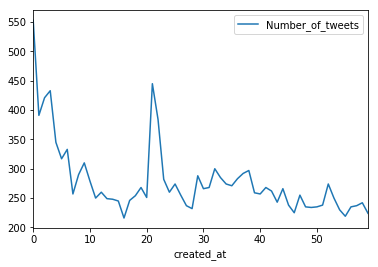

In [141]:
second_count.plot()

<h3>1. How to.....................explained by Ellissa Pransisca Caesar</h3>

In [142]:
matplotlib.style.use('ggplot') # Make the graphs a bit prettier

In [143]:
plt.rcParams['figure.figsize'] = (15, 5)

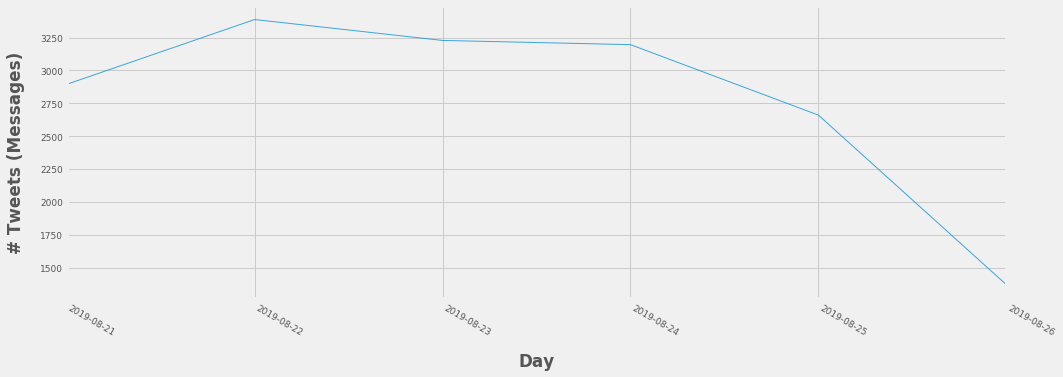

In [193]:
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)

daily_plot.set_xlabel('Day', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL

xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5)

([<matplotlib.axis.XTick at 0x2566b802cc0>,
 <a list of 6 Text xticklabel objects>)

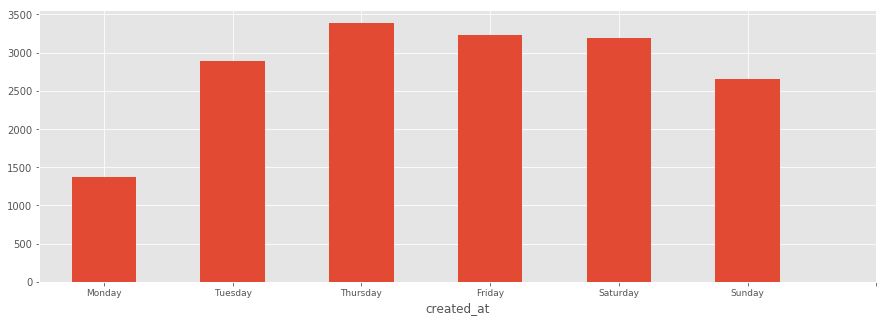

In [149]:
day_of_week_plot = weekday_count['Number_of_tweets'].plot(kind='bar')
xticks(np.arange(7), weekday_count['day'], rotation = 0, fontsize = 9)

In [151]:
mpl.style.use('dark_background')

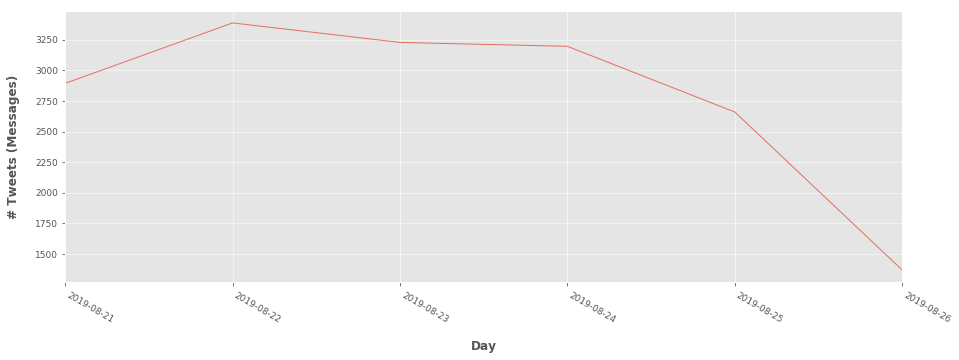

In [167]:
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)
daily_plot.set_xlabel('Day', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL
xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5)

([<matplotlib.axis.XTick at 0x2566d1046a0>,
 <a list of 6 Text xticklabel objects>)

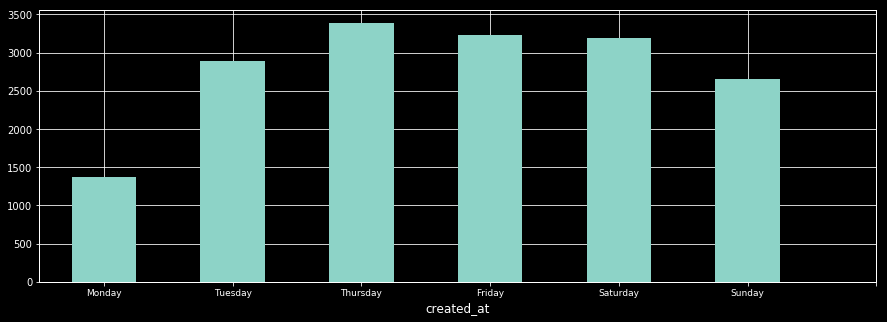

In [153]:
day_of_week_plot = weekday_count['Number_of_tweets'].plot(kind='bar')
xticks(np.arange(7), weekday_count['day'], rotation = 0, fontsize = 9)

In [154]:
mpl.style.use('bmh')

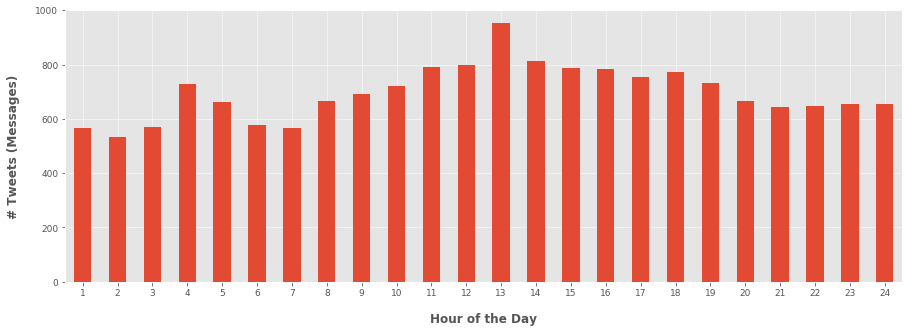

In [163]:
hourly_plot = hourly_count['Number_of_tweets'].plot(kind='bar')
hours = list(range(1,25))                                                 #GENERATE LIST FROM 1 TO 24
xticks(np.arange(24), hours, rotation = 0,fontsize = 9)                   #USE THE CUSTOM TICKS

hourly_plot.set_xlabel('Hour of the Day', weight='bold', labelpad=15)     #SET X-AXIS LABEL, ADD PADDING TO TOP OF X-AXIS LABEL
hourly_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL, ADD PADDING TO RIGHT OF Y-AXIS LABEL

xticks(fontsize = 9, rotation = 0, ha= "center")                          #SET FONT SIZE FOR X-AXIS TICK LABELS
yticks(fontsize = 9)                                                      #SET FONT SIZE FOR Y-AXIS TICK LABELS
daily_plot.tick_params(axis='x', pad=5)                                   #SET PADDING ABOVE X-AXIS LABELS

([], <a list of 0 Text xticklabel objects>)

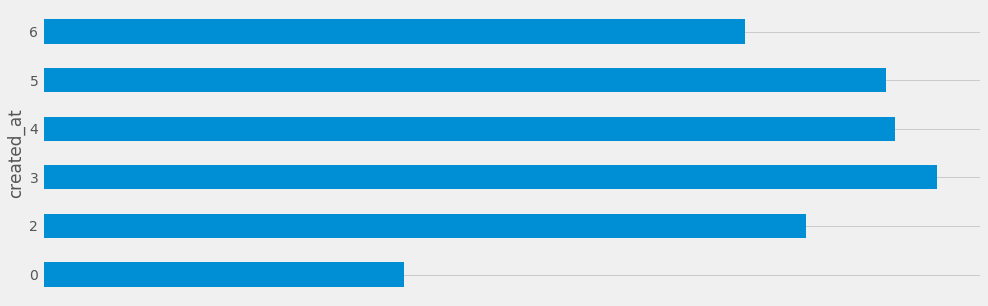

In [190]:
day_of_week_plot = weekday_count['Number_of_tweets'].plot(kind='barh')
xticks(np.arange(0), weekday_count['day'], rotation = 0, fontsize = 9)

In [157]:
mpl.style.use('grayscale')

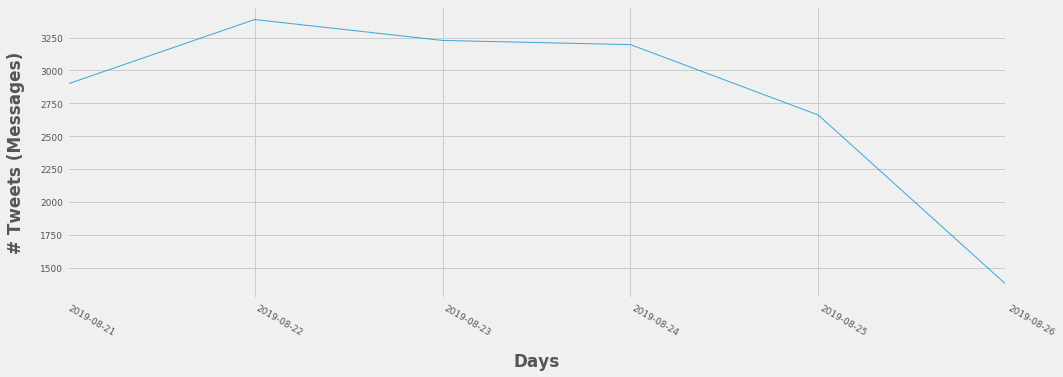

In [172]:
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)
daily_plot.set_xlabel('Days', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABE
xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5)

In [159]:
mpl.style.use('ggplot')

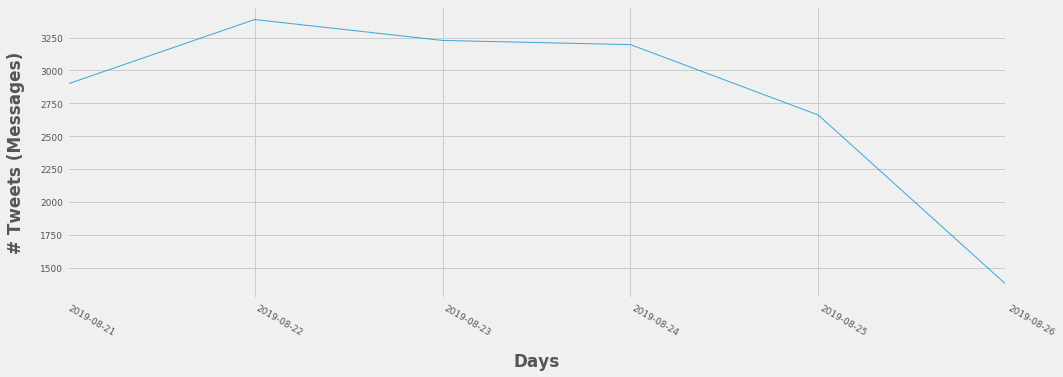

In [171]:
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)
daily_plot.set_xlabel('Days', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL
xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5)

In [169]:
mpl.style.use('fivethirtyeight')

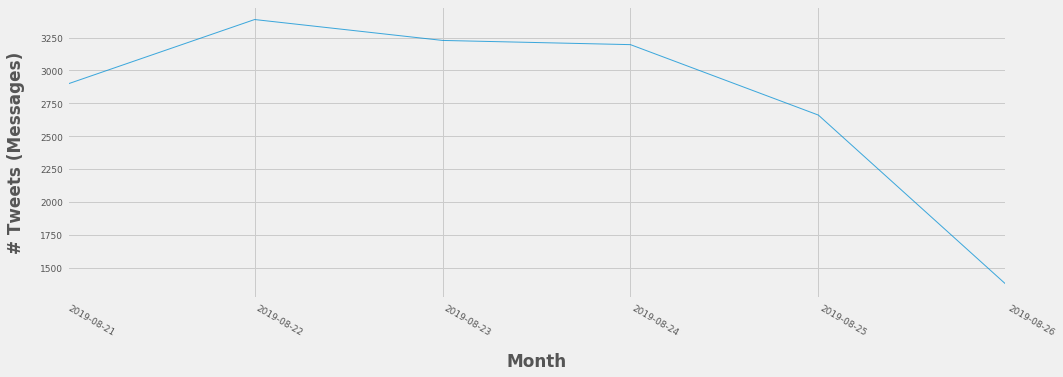

In [170]:
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)
daily_plot.set_xlabel('Days', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL
xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5)

<h3>4. How to.....................explained by Yoan Belinda</h3>

In [194]:
df_original = df[df['retweeted_status']!='THIS IS A RETWEET']
len(df_original)
len(df)-len(df_original)
df_original.head(2)

,contributors,coordinates,entities,extended_entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
created_at,,,,,,,,,,,,,,,,,,,,,
2019-08-26 12:51:27+00:00,None,None,"{'hashtags': [{'text': '헨리', 'indices': [78, 8...",NaN,0,False,None,1165970008045801473,1165970008045801473,None,...,NaN,NaN,NaN,29,False,{'created_at': 'Mon Aug 26 08:44:57 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...","RT @dispatchsns: [V LIVE] ""꿀 떨어진다"" (헨리, 캐서린 프레...",False,"{'id': 427466612, 'id_str': '427466612', 'name..."
2019-08-26 12:51:11+00:00,None,None,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1165969941297848321,1165969941297848321,None,...,NaN,NaN,NaN,4,False,{'created_at': 'Mon Aug 26 11:57:13 +0000 2019...,"<a href=""http://twitter.com/download/android"" ...",RT @rinakari: Jeg er blevet spurgt - temmelig ...,False,"{'id': 16201094, 'id_str': '16201094', 'name':..."


In [241]:
df_original.to_csv('Original datarandom.csv')

In [242]:
df_original['text'].describe()

count                                                 16735
unique                                                11256
top       RT @Liane13: #Gletscher in #Island und der #Sc...
freq                                                    331
Name: text, dtype: object

In [243]:
df_original['text'].value_counts()

RT @Liane13: #Gletscher in #Island und der #Schweiz sind tot. #Arktis und #Amazonas brennen. #Meere voller #Plastik, Atemluft voller Dreck.…          331
RT @sttepodcast: It's #podcast time! We celebrate our fifth anniversary by discussing the highlights from our first live show #SkipFest, &amp;…       225
RT @274ch_official: 中山競馬場のうまキッズルームのテープカット式典なっしー♪ちゃんとカットできたなっしー♪ヾ(。゜▽゜)ノ\n\n#船梨精 #ふなっしー #funassyi #動画 #movie #テープカット #opening #ceremony #式典 #P…        121
RT @DIVAGORGORCHA: #divagorgorcha #estreno #proximamente #pelicula #movie #actriz #locacion #location #cine #set #grabando #filmando #film…           106
RT @churchAlmighty: Surprising news! Are you still eagerly awaiting the Lord to come and take you into the kingdom of #heaven? The #movie M…           99
RT @davepperlmutter: This London Boy went to #Marbella for a dream #holiday BUT it turned out to be a nightmare! Read why the #1 BESTSELLER…           93
RT @antoniobanderas: Remembering Armand. #TBT\nInterview with the Vampire 19

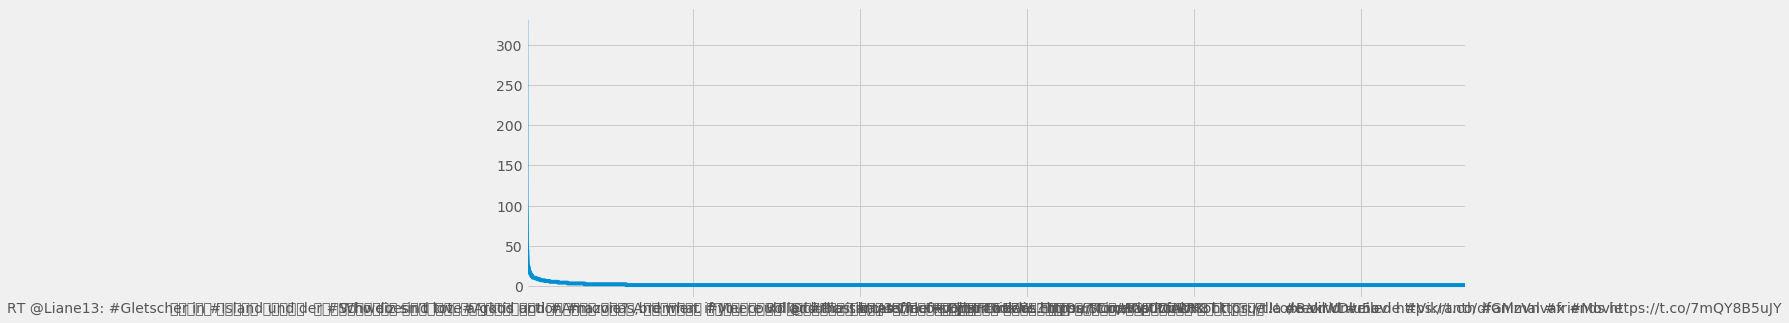

In [245]:
df_original['text'].value_counts().plot(kind='line')

In [227]:
df_original['text'].head()

created_at
2019-08-26 12:51:27+00:00    RT @dispatchsns: [V LIVE] "꿀 떨어진다" (헨리, 캐서린 프레...
2019-08-26 12:51:11+00:00    RT @rinakari: Jeg er blevet spurgt - temmelig ...
2019-08-26 12:50:39+00:00    RT @julianflynn: Shooting scene in Wasp Networ...
2019-08-26 12:50:34+00:00    #FunFact #14: For the movie “The Incredibles,”...
2019-08-26 12:50:25+00:00    Interesting things going on #Filmmaking #follo...
Name: text, dtype: object

In [232]:
text_list = []                          #CREATE EMPTY LIST 
for i in df_original.text:    #LOOP OVER EVERY CELL IN ENTITIES_HASHTAGS
    if pd.notnull(i):                      #IF CELL NOT EMPTY
        tags = i.split()                   #SPLIT EACH CELL INTO SEPARATE HASHTAGS
        for t in tags:                     #FOR EACH TAG IN THE CELL
            t = "#"+t                      #ADD '#' SYMBOL TO BEGINNING OF EACH TAG
            t = t.replace(',', '')         #REMOVE COMMAS FROM END OF TAGS
            t = t.lower()                  #MAKE TAG LOWER CASE
            text_list.append(t)         #ADD TAG TO OUR LIST
len(text_list)                    #PRINT NUMBER OF ITEMS IN OUR LIST
text_list[:20]                          #SHOW THE FIRST 20 ITEMS OF THE LIST

['#rt',
 '#@dispatchsns:',
 '#[v',
 '#live]',
 '#"꿀',
 '#떨어진다"',
 '#(헨리',
 '#캐서린',
 '#프레스콧)',
 '#🎬',
 '#https://t.co/a3kyc1vobg',
 '##헨리',
 '##henry',
 '##캐서린',
 '##캐서린_프레스콧',
 '##kathryn_prescott',
 '##안녕_베일리',
 '##영화',
 '##movi…',
 '#rt']

In [233]:
Series(text_list).value_counts()

##movie                                                 8300
#rt                                                     7374
#the                                                    5940
#a                                                      3371
#of                                                     2617
#to                                                     2559
#in                                                     2201
#and                                                    1684
#for                                                    1506
##film                                                  1482
#-                                                      1435
#is                                                     1404
#movie                                                  1394
#you                                                    1302
#on                                                     1194
#by                                                     1183
#.                      

In [234]:
cnt_hashtags = DataFrame(Series(text_list).value_counts())  
cnt_hashtags.columns = ['tag_frequency']                       #GIVE A NAME TO THE COLUMN
len(cnt_hashtags)
cnt_hashtags

,tag_frequency
##movie,8300
#rt,7374
#the,5940
#a,3371
#of,2617
#to,2559
#in,2201
#and,1684
#for,1506
##film,1482


In [235]:
def count_hashtags(s):
    hashtag_list_v3 = []     #CREATE EMPTY LIST 
    for i in s:           #LOOP OVER ITEMS IN 'S'
        hashtag = filter(lambda x: x.startswith('#'),i.split()) 
        hashtag = map(lambda x: x.strip('/;,-.:!?"''()'),hashtag)  ##remove the indicated punctuations
        hashtag = map(lambda x: x.strip(),hashtag)    #STRIP REMOVES 
        hashtag = map(lambda x: x.lower(),hashtag)    #IF WE WANT LOWER CASE TAGS (OTHERWISE, COUNT IS CASE SENSITIVE)
        hashtag_list_v3.extend(hashtag)  
    return DataFrame(Series(hashtag_list_v3).value_counts())

In [236]:
count_hashtags(df_original.text)  #INVOKE FUNCTION AND PROVIDE NAME TO DATAFRAME

,0
#movie,8535
#film,1488
#movies,854
#映画,834
#cinema,666
#horror,565
#theohioplayersproject,562
#plastik,518
#eiga,400
#art,392


In [237]:
cnt_hashtags.to_csv('count_hashtags.csv') ## export the results

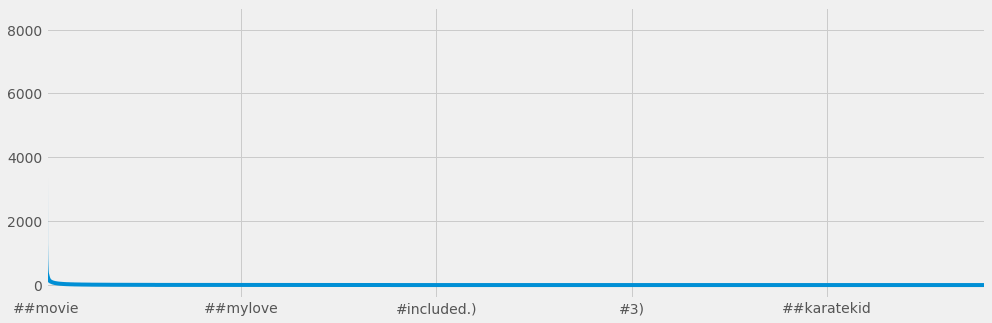

In [238]:
cnt_hashtags['tag_frequency'].plot()

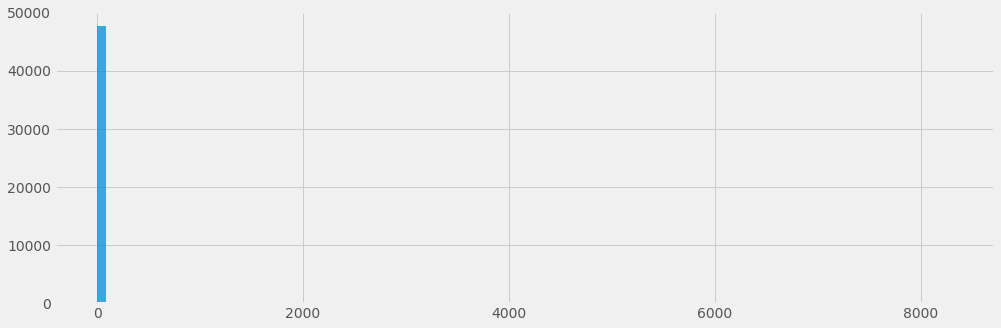

In [246]:
density_plot = cnt_hashtags['tag_frequency'].hist(bins=100, alpha=0.75)

In [247]:
cnt_hashtags['tag_frequency'].value_counts()

1       30458
2        6417
3        2899
4        1635
5        1118
6         831
7         584
8         517
9         365
10        332
11        285
13        206
14        189
12        179
15        116
16        111
19         99
18         94
17         94
21         78
22         75
20         70
23         61
28         55
25         47
24         44
29         44
26         43
27         40
30         35
        ...  
1194        1
266         1
207         1
170         1
138         1
841         1
361         1
329         1
201         1
252         1
172         1
812         1
908         1
602         1
175         1
351         1
1102        1
366         1
334         1
206         1
142         1
249         1
569         1
7374        1
397         1
333         1
205         1
173         1
442         1
1183        1
Name: tag_frequency, Length: 278, dtype: int64

<h3>5. How to.....................explained by Russell</h3>

In [5]:
from __future__ import division
6817/10800
#63% hashtag digunakan hanya sekali

0.6312037037037037

In [251]:
cnt_hashtags['tag_frequency'].value_counts(normalize=True)

1       0.633038
2       0.133371
3       0.060253
4       0.033982
5       0.023236
6       0.017271
7       0.012138
8       0.010745
9       0.007586
10      0.006900
11      0.005923
13      0.004281
14      0.003928
12      0.003720
15      0.002411
16      0.002307
19      0.002058
18      0.001954
17      0.001954
21      0.001621
22      0.001559
20      0.001455
23      0.001268
28      0.001143
25      0.000977
24      0.000914
29      0.000914
26      0.000894
27      0.000831
30      0.000727
          ...   
1194    0.000021
266     0.000021
207     0.000021
170     0.000021
138     0.000021
841     0.000021
361     0.000021
329     0.000021
201     0.000021
252     0.000021
172     0.000021
812     0.000021
908     0.000021
602     0.000021
175     0.000021
351     0.000021
1102    0.000021
366     0.000021
334     0.000021
206     0.000021
142     0.000021
249     0.000021
569     0.000021
7374    0.000021
397     0.000021
333     0.000021
205     0.000021
173     0.0000

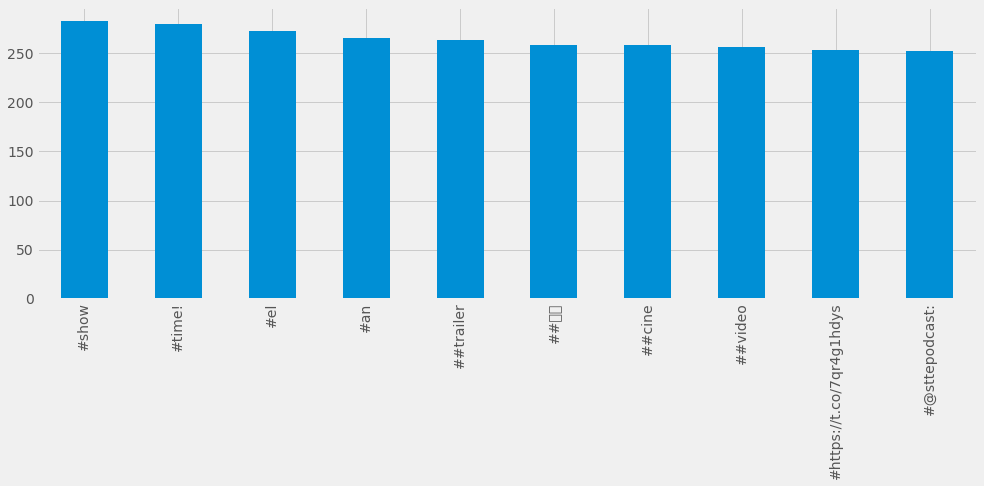

In [254]:
cnt_hashtags['tag_frequency'][90:100].plot(kind='bar')

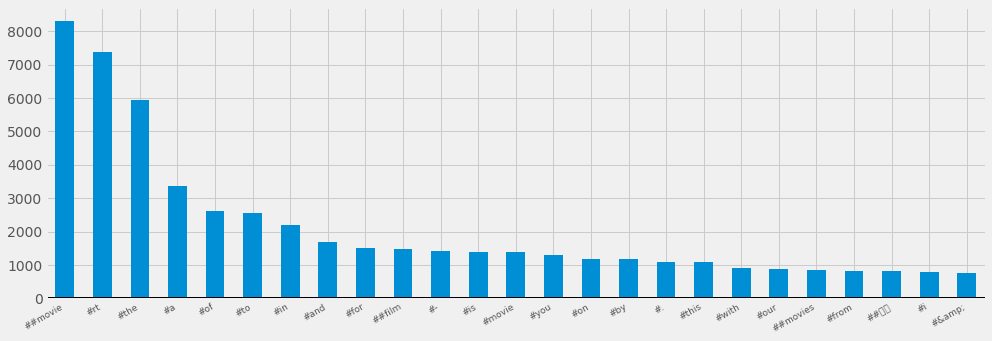

In [255]:
cnt_hashtags['tag_frequency'][:25].plot(kind='bar')
axhline(0, color='k')
#title('Top 25 hashtags')
xticks(fontsize = 9,rotation = 30, ha='right')
savefig('25 most popular tags.png', bbox_inches='tight', dpi=300, format='png')
show()

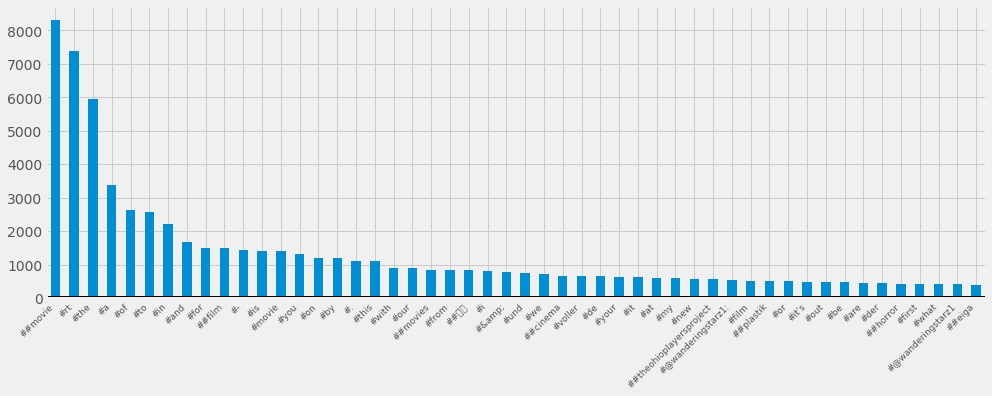

In [256]:
cnt_hashtags['tag_frequency'].head(50).plot(kind='bar')
axhline(0, color='k')
#title('Top 50 hashtags')
xticks(fontsize = 9,rotation = 45, ha='right')
savefig('50 most popular tags.png', bbox_inches='tight', dpi=300, format='png')
show()

In [8]:
train  = pd.read_csv('train.csv')
test = pd.read_csv('test_tweets.csv')

In [9]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [10]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [11]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [12]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

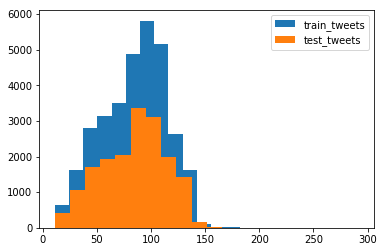

In [13]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

In [14]:
combi = train.append(test, ignore_index=True)
combi.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(49159, 3)

In [15]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [16]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [17]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [18]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [19]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [20]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

In [21]:
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [22]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [23]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet

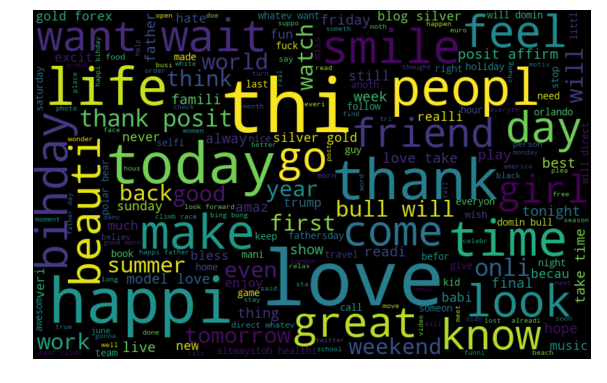

In [24]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

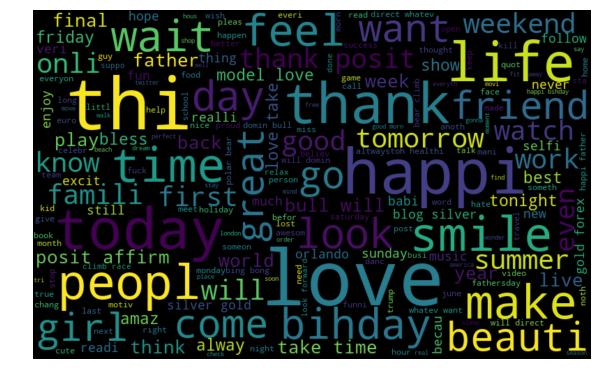

In [25]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

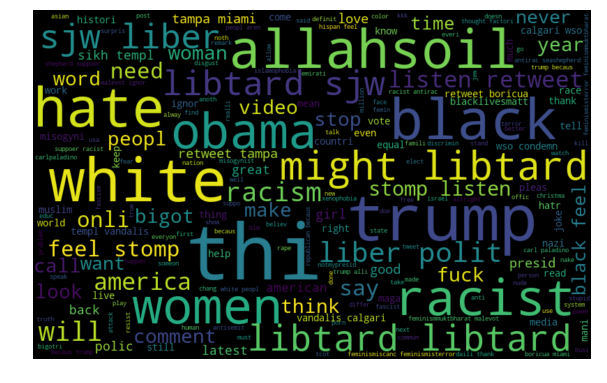

In [26]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [8]:
km=pd.read_csv('Original_datarandom.csv')
km.head()

,created_at,contributors,coordinates,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,2019-08-26 12:51:27+00:00,NaN,NaN,"{'hashtags': [{'text': '헨리', 'indices': [78, 8...",NaN,0,False,NaN,1165970008045801473,1165970008045801473,...,NaN,NaN,NaN,29,False,{'created_at': 'Mon Aug 26 08:44:57 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...","RT @dispatchsns: [V LIVE] ""꿀 떨어진다"" (헨리, 캐서린 프레...",False,"{'id': 427466612, 'id_str': '427466612', 'name..."
1,2019-08-26 12:51:11+00:00,NaN,NaN,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,1165969941297848321,1165969941297848321,...,NaN,NaN,NaN,4,False,{'created_at': 'Mon Aug 26 11:57:13 +0000 2019...,"<a href=""http://twitter.com/download/android"" ...",RT @rinakari: Jeg er blevet spurgt - temmelig ...,False,"{'id': 16201094, 'id_str': '16201094', 'name':..."
2,2019-08-26 12:50:39+00:00,NaN,NaN,"{'hashtags': [{'text': 'actors', 'indices': [9...",NaN,0,False,NaN,1165969809349038081,1165969809349038081,...,NaN,NaN,NaN,14,False,{'created_at': 'Sun Aug 25 10:58:28 +0000 2019...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @julianflynn: Shooting scene in Wasp Networ...,False,"{'id': 1165949283528409088, 'id_str': '1165949..."
3,2019-08-26 12:50:34+00:00,NaN,NaN,"{'hashtags': [{'text': 'FunFact', 'indices': [...",NaN,0,False,NaN,1165969788390301697,1165969788390301697,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...","#FunFact #14: For the movie “The Incredibles,”...",True,"{'id': 1164301872150319110, 'id_str': '1164301..."
4,2019-08-26 12:50:25+00:00,NaN,NaN,"{'hashtags': [{'text': 'Filmmaking', 'indices'...",NaN,0,False,NaN,1165969747168628737,1165969747168628737,...,{'created_at': 'Mon Aug 26 10:09:54 +0000 2019...,1.165929e+18,1.165929e+18,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Interesting things going on #Filmmaking #follo...,False,"{'id': 1165967435276722176, 'id_str': '1165967..."


Text(0, 0.5, 'favorite_count')

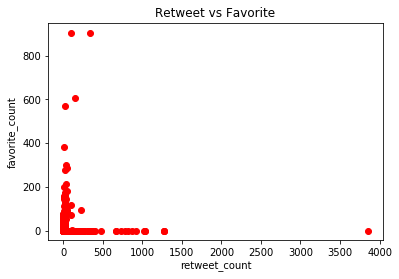

In [13]:
fig,ax=plt.subplots()

ax.scatter(km['retweet_count'],km['favorite_count'],color = ['red'])
ax.set_title('Retweet vs Favorite')
ax.set_xlabel('retweet_count')
ax.set_ylabel('favorite_count')

Text(0, 0.5, 'favorite_count')

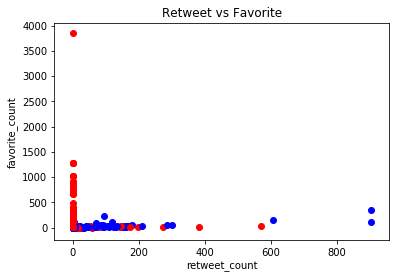

In [14]:
colors = {False:'r',True:'b'}
fig ,ax = plt.subplots()

for i in range(len(km['favorited'])):
    ax.scatter(km['favorite_count'][i], km['retweet_count'][i],color = colors[km['truncated'][i]])
ax.set_title('Retweet vs Favorite')
ax.set_xlabel('retweet_count')
ax.set_ylabel('favorite_count')


<h4> 

Technopreneur Group 
Pohon Kelapa
Ketiup angin ngiur-ngiur
Nama adalah doa
Semoga jadi Technopreneur
Assalammu’alaikum wr.wb
Selamat Sinag dan Salam sejahtera untuk kita semua 
Terimakasih kepada team pengajar dan instruktur yang telah memberikan kesempatan kepada kami untuk mempresentasikan Final Project Technopreneur Group Digital Talent Scholarship 2019
Kami perkenalkan bagian dari team kami, yang pertama 
1. Dengan saya Ellissa Fransisca Caesar dari Politeknik Teknologi Kimia Industri Medan 
2. Meilani dari Universitas Islam Negeri Medan 
3. Rabiatul Adawiyah dari Universitas Islam Negeri Medan 
4. Russell dari Miskroskil Medan 
5. Yoan Belinda dari Universitas indo global mandiri palembang
Baik Marilah kita simak penyampaian materi pertama, kepada meilani kami persilahkan

Demikian presentasi yang dapat kami sampaikan, semoga dapat bermanfaat untuk kita semua. Wassalammu’alaikum wr.wb

</h4>